<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/ODE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modify the test code for the Euler method function to that it can be done just with pythod ODE solvers.



<ipython-input-20-cd42b5233a7f>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


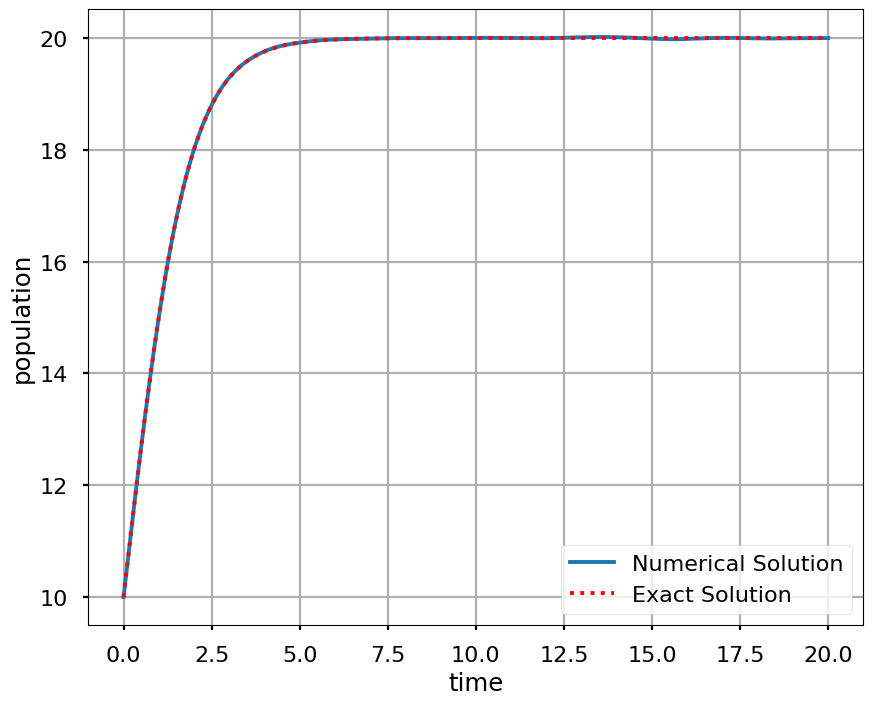

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline

from functools import partial

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

# Changed line
f =  lambda t, s: r*s*(1-(s/K))
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()



Write a function myRK4(ds,tspan,s0)
, where the input and output arguments are the same as in problem 5. The function myRK4
 should numerically integrate ds using the fourth-order Runge-Kutta method.

In [21]:
def myRK4(ds, t_span, s0):
    # put your code here
    t=t_span
    h = t[1]-t[0]
    s = np.zeros(len(t))
    s[0]=s0
    for i in range(1,len(t)):
      k1 = ds(t[i-1],s[i-1])
      k2 = ds(t[i-1] + (h/2),s[i-1]+(k1*h/2))
      k3 = ds(t[i-1] + (h/2),s[i-1]+(k2*h/2))
      k4 = ds(t[i-1]+h,s[i-1]+k3*h)
      s[i] = s[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return [t, s]

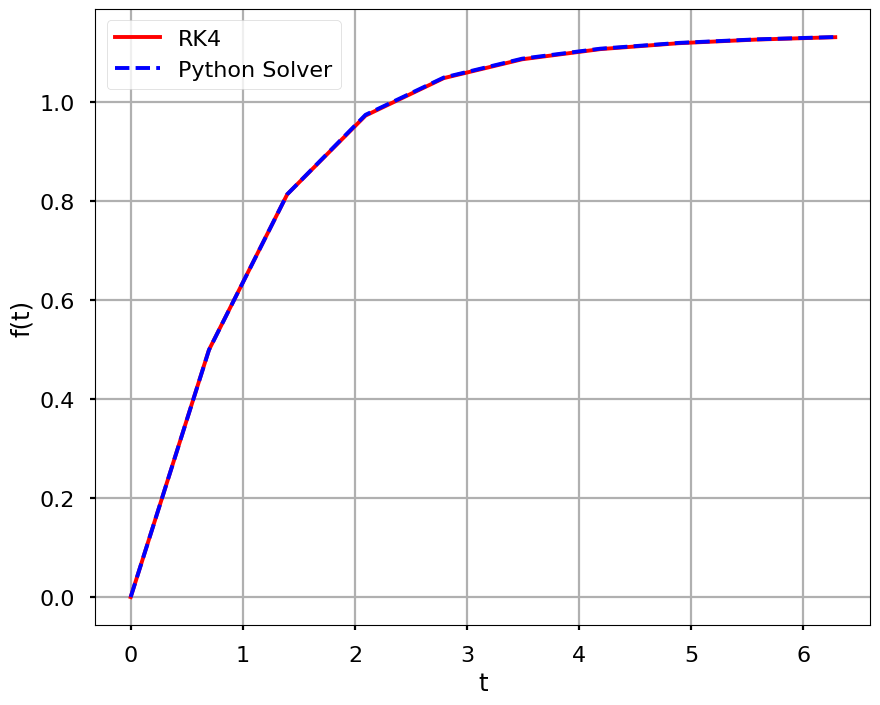

In [22]:
f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()
